# Project: Visualizing Geographic Data with Basemap toolkit (EUROSTAT)

## Questions to address:
- Population of European capitals on a map
- Evolution of unemployment rate for different European countries

## Tools:
- Basemap Toolkit

<br>

### load defaults

In [131]:
import pandas as pd
import re
import numpy as np

from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib import rcParams

from functions import *

plt.rcParams.update({'axes.titlepad': 20, 'font.size': 12, 'axes.titlesize':20})

colors = [(0/255,107/255,164/255), (255/255, 128/255, 14/255), 'red', 'green', '#9E80BA', '#8EDB8E', '#58517A']

<br>

## Dataset: 
files: 
- 'eurostat_urbpop.csv', 'eurostat_unrate.tsv': https://ec.europa.eu/eurostat/data/database
- worldcities.csv: https://simplemaps.com/data/world-cities

In [137]:
#df_eurostat=pd.read_csv('./data/eurostat_urbpop.csv', encoding='Latin-1')
#display(df_eurostat[:3])
df_unrate_full=pd.read_csv('./data/eurostat_unrate.csv', encoding='Latin-1')
df_unrate_full.set_index('country', drop=True, inplace=True)
df_unrate = df_unrate_full.iloc[4:]
display(df_unrate[:7])
#display(df_unrate)

world_cities = pd.read_csv('./data/worldcities.csv', encoding='Latin-1')
cols = ['city','lat','lng','country','population']
cities = world_cities[cols]
capitals = cities.loc[world_cities['capital']=='primary']
#display(capitals[:3])

euro_capitals = capitals[(capitals['lat']>34) & (capitals['lat']<70) & 
                         (capitals['lng']>-30) & (capitals['lng']<40) & 
                         (capitals['population']>0.)].reset_index(drop=True)

euro_cities = cities[(cities['lat']>34) & (cities['lat']<70) & 
                         (cities['lng']>-30) & (cities['lng']<40) & 
                         (cities['population']>0.)].reset_index(drop=True)

display(euro_capitals[:3])

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,,
Belgium,8.3,7.5,7.0,7.9,8.3,7.2,7.6,8.4,8.5,8.5,7.8,7.1
Bulgaria,9.0,6.9,5.6,6.8,10.3,11.3,12.3,13.0,11.4,9.2,7.6,6.2
Czechia,7.1,5.3,4.4,6.7,7.3,6.7,7.0,7.0,6.1,5.1,4.0,2.9
Denmark,3.9,3.8,3.4,6.0,7.5,7.6,7.5,7.0,6.6,6.2,6.2,5.7
Germany,10.1,8.5,7.4,7.6,7.0,5.8,5.4,5.2,5.0,4.6,4.1,3.8
Estonia,5.9,4.6,5.5,13.5,16.7,12.3,10.0,8.6,7.4,6.2,6.8,5.8
Ireland,4.8,5.0,6.8,12.6,14.6,15.4,15.5,13.8,11.9,10.0,8.4,6.7


,city,lat,lng,country,population
0,Vaduz,47.1337,9.5167,Liechtenstein,36281.0
1,Vilnius,54.6834,25.3166,Lithuania,542366.0
2,Luxembourg,49.6117,6.1300,Luxembourg,107260.0


<br>

## Analysis:

<br>

### Q1: Population of European Cities

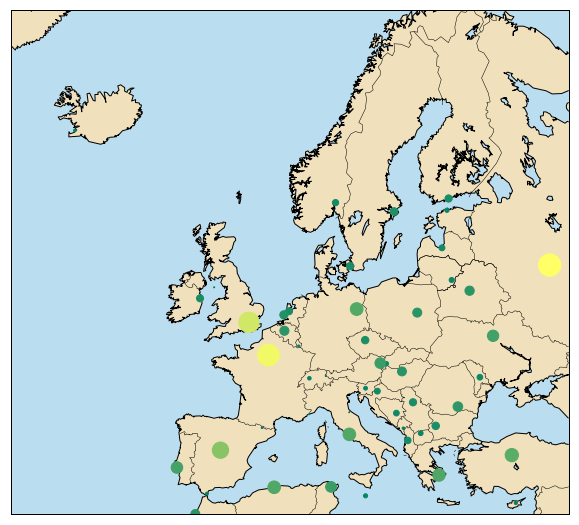

In [19]:
from mpl_toolkits.basemap import Basemap

fig, ax = plt.subplots(figsize=(10,10))
m = Basemap(projection='merc', llcrnrlat=34, urcrnrlat=70, llcrnrlon=-30, urcrnrlon=40, resolution='l')
m.drawcoastlines()
m.fillcontinents(color='#F0E0BB', lake_color='#BBDDF0')
m.drawmapboundary(fill_color='#BBDDF0')
m.drawcountries(linewidth=0.5)

longitudes = euro_capitals['lng'].tolist()
latitudes = euro_capitals['lat'].tolist()
population = euro_capitals['population']
re_scaled_pop = convert_range_01(population)
m.scatter(longitudes, latitudes, s=re_scaled_pop*500, zorder=2, latlon=True, c=population, cmap='summer')

plt.show()

<br>

### Q2: Population of German Cities

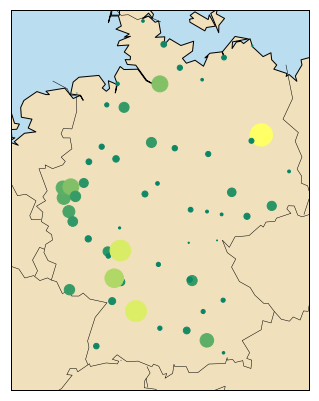

In [150]:
from mpl_toolkits.basemap import Basemap

fig, ax = plt.subplots(figsize=(7,7))
m = Basemap(projection='merc', llcrnrlat=47, urcrnrlat=55, llcrnrlon=5, urcrnrlon=15, resolution='l')
m.drawcoastlines()
m.fillcontinents(color='#F0E0BB', lake_color='#BBDDF0')
m.drawmapboundary(fill_color='#BBDDF0')
m.drawcountries(linewidth=0.5)

german_cities = cities.loc[cities['country']=='Germany', :]

longitudes = german_cities['lng'].tolist()
latitudes = german_cities['lat'].tolist()
population = german_cities['population']
re_scaled_pop = convert_range_01(population)
m.scatter(longitudes, latitudes, s=re_scaled_pop*500, zorder=2, latlon=True, c=population, cmap='summer')

plt.show()

<br>

### Q3: evolution of unemployment rate in EU countries

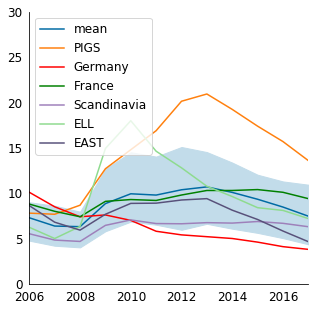

In [136]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()

#get columns as list of floats
years = [float(x) for x in df_unrate.columns.values.tolist()]

#calculate statistics for all countries
stats = df_unrate.describe(percentiles = [0.16,.84])
p16 = stats.loc['16%',:]
p50 = stats.loc['50%',:]
p84 = stats.loc['84%',:]
mean = stats.loc['mean',:]

#plot global stats
ax.fill_between(years,p16,p84, color = '#C2DCEA')
#ax.plot(years,p50,color=colors[0])
ax.plot(years,mean,color=colors[0])

Scandinavia_mean = df_unrate.loc[['Finland','Sweden','Norway','Denmark'],:].apply(np.mean)
Pigs_mean = df_unrate.loc[['Portugal','Ireland','Greece','Spain'],:].apply(np.mean)
EAST_block_mean = df_unrate.loc[['Czechia','Poland','Hungary','Slovenia'],:].apply(np.mean)
ELL_mean = df_unrate.loc[['Estonia','Latvia','Lithuania'],:].apply(np.mean)


#plot stats for individual countries
plt.plot(years,Pigs_mean,color=colors[1], label='PIGS')
plt.plot(years,df_unrate.loc['Germany',:],color=colors[2])
plt.plot(years,df_unrate.loc['France',:],color=colors[3])
plt.plot(years,Scandinavia_mean,color=colors[4], label='Scandinavia')
plt.plot(years,ELL_mean,color=colors[5], label='ELL')
plt.plot(years,EAST_block_mean,color=colors[6], label='EAST')

#for element in df_unrate.index:
    #print (element)
#    plt.plot(df_unrate.loc[element,:])

#improve  Aesthetics
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(left=False, right=False, top=False, bottom=False)
ax.set_xlim(2006, 2017); ax.set_ylim(0,30)
ax.legend(loc='upper left')

plt.show()